<a href="https://colab.research.google.com/github/earo12/Case-Study-ANN/blob/main/ANN_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANN Case Study

This project has the purpose of look whether a customer will leave a bank or not, here we have a little dataset which help us to work with artificial neural network to provide information about the main topic we are looking for.

The dataset has the following features:

1) RowNumber

2) CustomerId

3) SurName

4) CreditScore

5) Geography

6) Gender (1 for male, 0 for female)

7) Age

8) Tenure

9) Balance

10) NumofProducts

11) HasCrCard

12) IsActiveMember

13) EstimatedSalary

14) Exited 

Here, we have to find out the value of "Exited" by following the other features, if we have a value of 1 in this feature, we can say that the customer will leave the bank, in other case, we can say that the customer will stay in the bank.


First we have to load the libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler  
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve, auc

Next, we have to load the dataset, also we can take a look at the first 5 rows.

In [3]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Let's check if there are some missing values or not

In [ ]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Now, we'll see the dimension of the dataset

In [4]:
df.shape

(10000, 14)

Let's check the kind of variable on each category

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Now, let's check whether there's a correlation between each variable, we can do that easily with the heatmap:

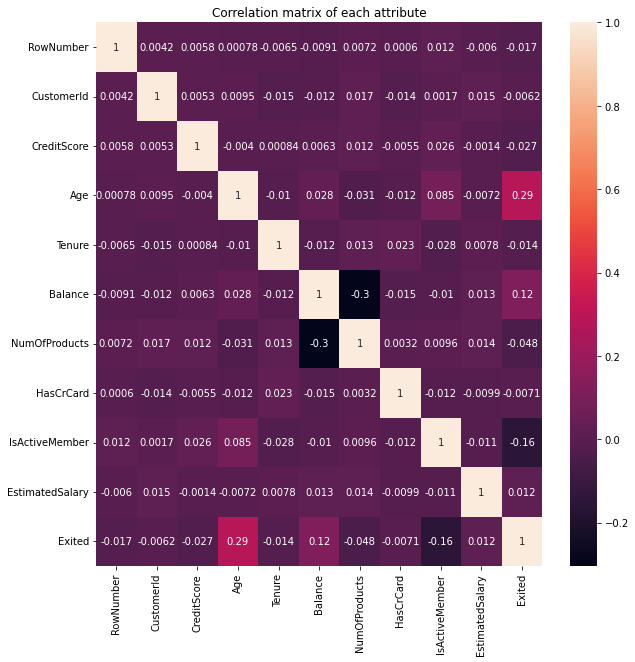

In [6]:
plt.rcParams['figure.figsize'] = (10,10)
sns.heatmap(df.corr(),annot = True)
plt.title('Correlation matrix of each attribute')
plt.show()

Bassically, we can say that only the "Age" variable is the most correlated with the "Exited" variable, which is the goal, but not at all indeed.

Let's make an study with the categorical variables:

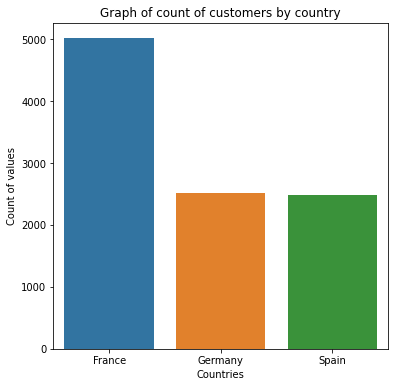

In [16]:
x_vals = df['Geography'].value_counts()
plt.rcParams['figure.figsize'] = (6,6)
sns.barplot(data = df, x = x_vals.index, y = x_vals.values)
plt.xlabel('Countries')
plt.ylabel('Count of values')
plt.title('Graph of count of customers by country')
plt.show()

We can do the same thing with the gender feature:

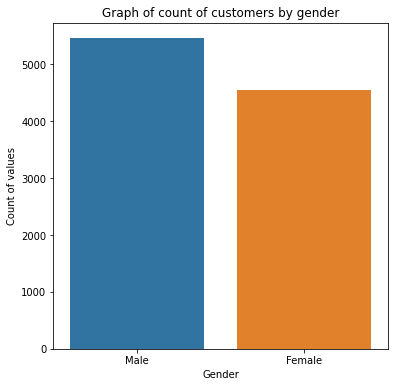

In [19]:
x_vals = df['Gender'].value_counts()
sns.barplot(data = df, x = x_vals.index, y = x_vals.values)
plt.xlabel('Gender')
plt.ylabel('Count of values')
plt.title('Graph of count of customers by gender')
plt.show()

Most of the customers are male, now let's take a look at the distribution of Ages.

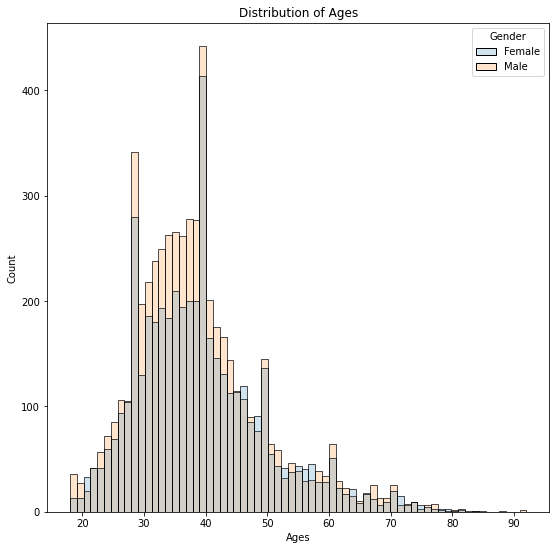

In [22]:
# This function takes the 'Age' feature and takes the hue by Sex
plt.rcParams['figure.figsize'] = (9,9)
def age_plot(): 
  sns.boxplot(data = df, x = df['Age'], hue = df['Gender'],alpha = 0.2)
  plt.xlabel('Ages')
  plt.ylabel('Count')
  plt.title('Distribution of Ages')
  plt.show()

age_plot()

If we pay attention to this graph, we can see that most of the customers of this bank are 40 years old, the graph is skewed to the right, so the mean will be greater than the median.

Now, from those fourteen thousand values, we can define the variables we're going to use, if we see in the dataset, the first three columns won't be needed indeed, so basically we can start to count values from the third column and exclude the last column, because we're going to predict that one, that will be our X variable.

Basically, the y variable will take all the values as well, but we have to be carefull when we have to take the columns we're going to need, here we only need the output of the model, i.e., the last column, we can do that by following the next two lines of code:

In [ ]:
X = df.iloc[:,3:-1].values
y = df.iloc[:,-1].values

In [ ]:
le = LabelEncoder()
X[:,2] = le.fit_transform(X[:,2])

In [ ]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough' )#Here we want to change the second column of X
X = np.array(ct.fit_transform(X))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
ann = tf.keras.models.Sequential()

In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [ ]:
ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [ ]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 [==============================] - 2s 2ms/step - loss: 0.4980 - accuracy: 0.7922
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4536 - accuracy: 0.7964
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4419 - accuracy: 0.7999
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8070
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4324 - accuracy: 0.8091
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4292 - accuracy: 0.8135
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8155
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4244 - accuracy: 0.8169
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4217 - accuracy: 0.8185
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4189 - accura

In [ ]:
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)
print(ann.predict(sc.transform([[0, 0, 1, 5690, 0, 33, 1, 7000, 7, 1, 0, 434317]])) > 0.5)
print(ann.predict(sc.transform([[0, 1, 0, 4210, 1, 57, 7, 90000, 3, 0, 0, 817123]])) > 0.5)

1/1 [==============================] - 0s 58ms/step
[[False]]
1/1 [==============================] - 0s 119ms/step
[[ True]]
1/1 [==============================] - 0s 40ms/step
[[False]]


In [ ]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

63/63 [==============================] - 0s 3ms/step
[[1504   91]
 [ 185  220]]


0.862

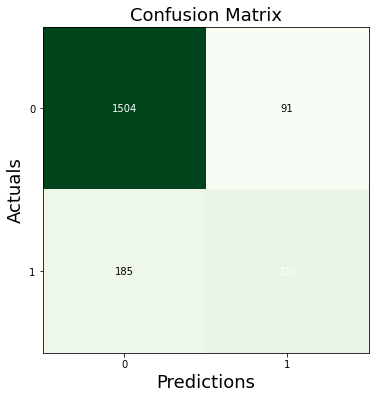

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
 
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()